# USTC-AD/2024 课程作业 实验报告

| 实验 3          | 威斯康辛州乳腺癌数据集探索与分析 |
| --------------- | -------------------------------- |
| 马天开          | PB21000030                       |
| Due: 2024.04.28 | Submitted: 2024.04.25            |


## Pt1: `pandas`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [2]:
df = pd.read_csv("data.csv", encoding="utf-8")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   567 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               567 non-null    float64
 14  perimeter_se             5

In [4]:
# removing all rows with empty values in it:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       560 non-null    int64  
 1   diagnosis                560 non-null    object 
 2   radius_mean              560 non-null    float64
 3   texture_mean             560 non-null    float64
 4   perimeter_mean           560 non-null    float64
 5   area_mean                560 non-null    float64
 6   smoothness_mean          560 non-null    float64
 7   compactness_mean         560 non-null    float64
 8   concavity_mean           560 non-null    float64
 9   concave points_mean      560 non-null    float64
 10  symmetry_mean            560 non-null    float64
 11  fractal_dimension_mean   560 non-null    float64
 12  radius_se                560 non-null    float64
 13  texture_se               560 non-null    float64
 14  perimeter_se             560 no

In [5]:
# reset df index:
df = df.reset_index(drop=True)

In [6]:
# dropping id column:
df = df.drop(columns=["id"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                560 non-null    object 
 1   radius_mean              560 non-null    float64
 2   texture_mean             560 non-null    float64
 3   perimeter_mean           560 non-null    float64
 4   area_mean                560 non-null    float64
 5   smoothness_mean          560 non-null    float64
 6   compactness_mean         560 non-null    float64
 7   concavity_mean           560 non-null    float64
 8   concave points_mean      560 non-null    float64
 9   symmetry_mean            560 non-null    float64
 10  fractal_dimension_mean   560 non-null    float64
 11  radius_se                560 non-null    float64
 12  texture_se               560 non-null    float64
 13  perimeter_se             560 non-null    float64
 14  area_se                  5

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
556,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
557,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
558,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df["diagnosis"].value_counts()

diagnosis
B    355
M    205
Name: count, dtype: int64

In [9]:
# set B -> 0, M -> 1:
df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
556,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
557,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
558,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
def handle(column: str) -> None:
    # for each colum, print mid, var, q1 q3, min, max, mean, median etc...:
    print(f"Column: {column}")
    print(f"Mean: {df[column].mean()}")
    # print(f"Median: {df[column].median()}")
    # print(f"Variance: {df[column].var()}")
    print(f"Standard Deviation: {df[column].std()}")
    print(f"Minimum: {df[column].min()}")
    print(f"Maximum: {df[column].max()}")
    print(f"Q1: {df[column].quantile(0.25)}")
    print(f"Q3: {df[column].quantile(0.75)}")
    print()

_ = [handle(column) for column in ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"]]

Column: radius_mean
Mean: 14.074301785714287
Standard Deviation: 3.491064449570111
Minimum: 6.981
Maximum: 28.11
Q1: 11.6775
Q3: 15.75

Column: texture_mean
Mean: 19.27175
Standard Deviation: 4.319014680293036
Minimum: 9.71
Maximum: 39.28
Q1: 16.1575
Q3: 21.802500000000002

Column: perimeter_mean
Mean: 91.59585714285713
Standard Deviation: 24.048328628379842
Minimum: 43.79
Maximum: 188.5
Q1: 74.9675
Q3: 103.725

Column: area_mean
Mean: 649.6439285714287
Standard Deviation: 347.45128727529766
Minimum: 143.5
Maximum: 2501.0
Q1: 418.325
Q3: 775.775

Column: smoothness_mean
Mean: 0.09628135714285714
Standard Deviation: 0.014087910812849068
Minimum: 0.05263
Maximum: 0.1634
Q1: 0.08629
Q3: 0.1051



In [11]:
# group by diagnosis, calculate CV for each column:
df_grouped = df.groupby("diagnosis")
df_grouped.std() / df_grouped.mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,0.146810,0.223512,0.151502,0.290776,0.145493,0.421460,0.943919,0.619809,0.142692,0.107291,...,0.148098,0.234088,0.155623,0.292836,0.160242,0.505433,0.846008,0.481809,0.154683,0.173924
1,0.182084,0.175314,0.187713,0.373423,0.124034,0.370451,0.467383,0.387497,0.143382,0.121587,...,0.200238,0.186279,0.205549,0.415632,0.153082,0.455924,0.407353,0.250869,0.232936,0.236436


## Pt2: `matplotlib`

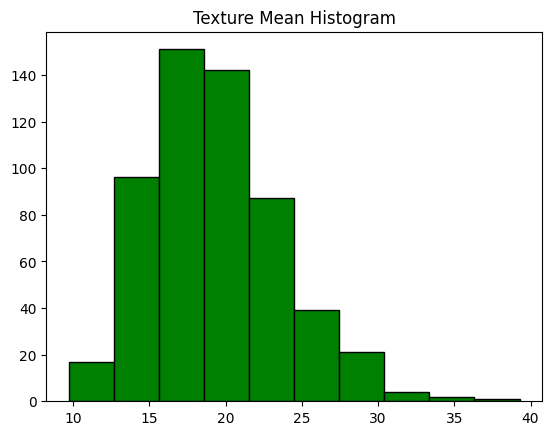

In [12]:
_ = plt.hist(df["texture_mean"], bins=10, color="green", edgecolor="black")
_ = plt.title("Texture Mean Histogram")

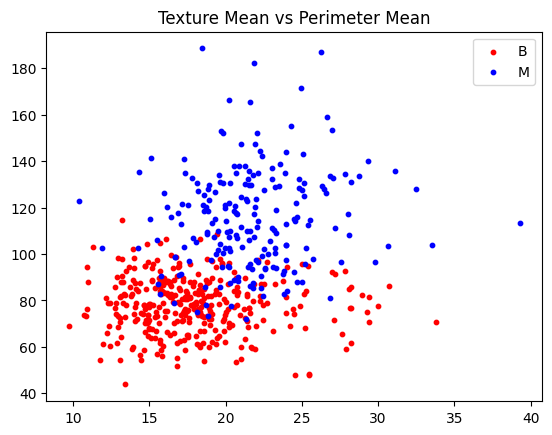

In [13]:
df_0 = df[df["diagnosis"] == 0]
df_1 = df[df["diagnosis"] == 1]
_ = plt.scatter(df_0["texture_mean"], df_0["perimeter_mean"], c="red", label="B", s=10)
_ = plt.scatter(df_1["texture_mean"], df_1["perimeter_mean"], c="blue", label="M", s=10)
plt.legend()
_ = plt.title("Texture Mean vs Perimeter Mean")

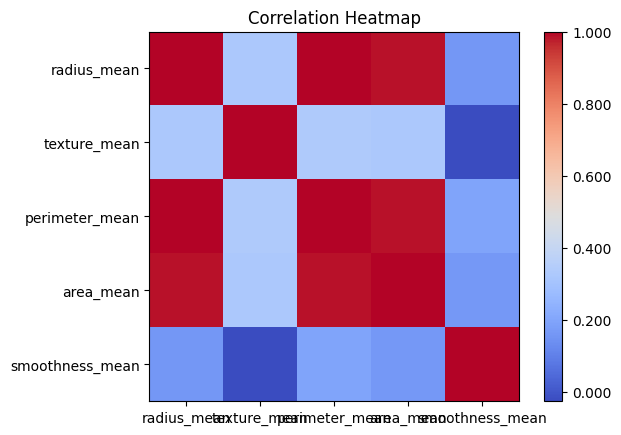

In [14]:
columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"]
corr = df[columns].corr()
_ = plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
_ = plt.colorbar(format="%.3f")
_ = plt.xticks(range(len(columns)), columns)
_ = plt.yticks(range(len(columns)), columns)
_ = plt.title("Correlation Heatmap")

## Pt3: 线性回归

In [15]:
X = df["radius_mean"]
Y = df["area_mean"]
X2 = X ** 2
X = np.column_stack((X, X2))
X = np.column_stack((np.ones(X.shape[0]), X))
W1 = np.linalg.inv(X.T @ X) @ X.T @ Y
W1

array([-4.70867951, -0.44260792,  3.14186228])

In [16]:
W2 = np.polyfit(df["radius_mean"], df["area_mean"], 2)
W2

array([ 3.14186228, -0.44260792, -4.70867951])

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

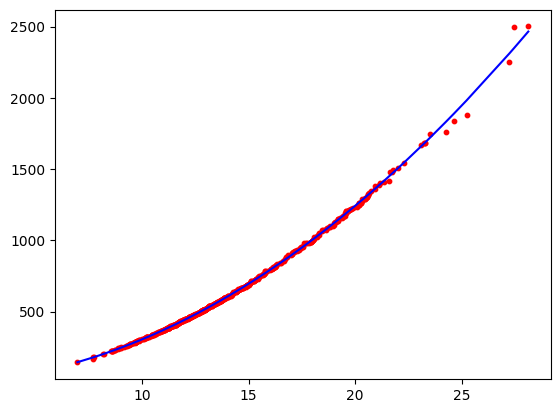

In [17]:
X = df["radius_mean"]
Y = df["area_mean"]
X = np.sort(X)
Y = np.sort(Y)
_ = plt.scatter(X, Y, s=10, color="red")
_ = plt.plot(X, W1[0] + W1[1] * X + W1[2] * X ** 2, color="blue")
_ = plt.label("Linear Regression")

从散点图可以看出 `radius_mean` 与 `area_mean` 之间有较强的相关性, 线性回归能很好的拟合这两者之间的关系

## Pt4: 数据降维

我们在下面简要讨论 PCA Principle component analysis 主成分分析的简要思路.

因为没读懂 exp3.pdf 中提示的思路, 我们直接提供从 `X` 到 `new_X` (`Z`) 的代码

In [ ]:
X = df[["perimeter_mean", "radius_mean"]].to_numpy()
mean_vec= np.mean(X, axis=0)
cov_mat = np.cov(X - mean_vec, rowvar=False)
fvalue, fvec = np.linalg.eig(cov_mat)
fvalue_sort = np.argsort(fvalue)[::-1]
fvalue = fvalue[fvalue_sort]
fvec = fvec[:, fvalue_sort]
new_X = X @ fvec
print(new_X)

[[124.11059852   0.19858123]
 [134.47614923   1.30391313]
 [131.47994405   0.84877078]
 ...
 [109.5611099    0.90177456]
 [141.60607044   0.30135467]
 [ 48.53749552   0.8096475 ]]


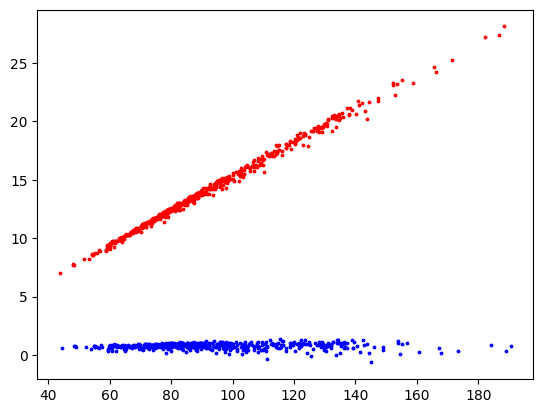

In [ ]:
_ = plt.scatter(X[:, 0], X[:, 1], s=3, color="red")
_ = plt.scatter(new_X[:, 0], new_X[:, 1], s=3, color="blue")

从图中可以看到 `new_X` 的 `y` 的分布集中在 `0` 附近, 我们可以舍弃 `new_X` 中的 `y` 以降低数据维度

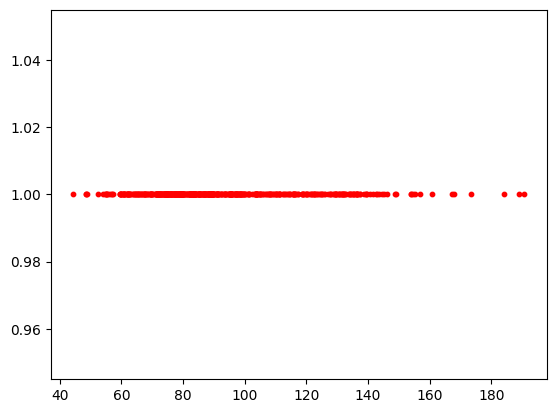

In [ ]:
X_pca = new_X[:, 0]
_ = plt.scatter(X_pca, np.ones(X_pca.shape[0]), s=10, color="red")

## Pt5: T检验

In [ ]:
df_grouped = df.groupby("diagnosis")
concavity_worst = df_grouped["concavity_worst"].apply(list)
print(concavity_worst)

diagnosis
0    [0.239, 0.189, 0.08867, 0.04833, 0.0688, 0.305...
1    [0.7119, 0.2416, 0.4504, 0.6869, 0.4, 0.5355, ...
Name: concavity_worst, dtype: object


Q1: 简述本情境下应使用成组检验还是成对检验?

A1: 本情境下应使用成对检验, 因为我们要比较的是两个不同的数据集的均值, 而不是同一个数据集的两个不同的样本的均值

Q2: 计算两组数据的平均值, 写出探测检验原假设:

In [ ]:
B = concavity_worst[0]
M = concavity_worst[1]
B_mean = np.mean(B)
M_mean = np.mean(M)
print(B_mean, M_mean)

0.1663615971830986 0.44671356097560977


单侧检验: $H_0: \mu_1 - \mu_2 = 0$ vs $H_1: \mu_1 - \mu_2 > 0$

Q3: 使用`scipy.stats`中的相关方法, 执行量样本单侧T检验:

In [ ]:
t, p = scipy.stats.ttest_ind(B, M)
print(t, p)

-20.346631967479436 2.928169352602799e-69


Q4: 简述你从以上两样本 T 检验的结果中能得出什么结论？

A4: $ t= -20.3, p = 2.92e-69 $, 因为 $p < 0.05$, 我们拒绝原假设, 即两组数据的均值不相等